Dataset Iris cargado: 150 muestras, 4 dimensiones originales.
Ejecutando t-SNE (Perplexity: 10)... Esto es rápido.


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


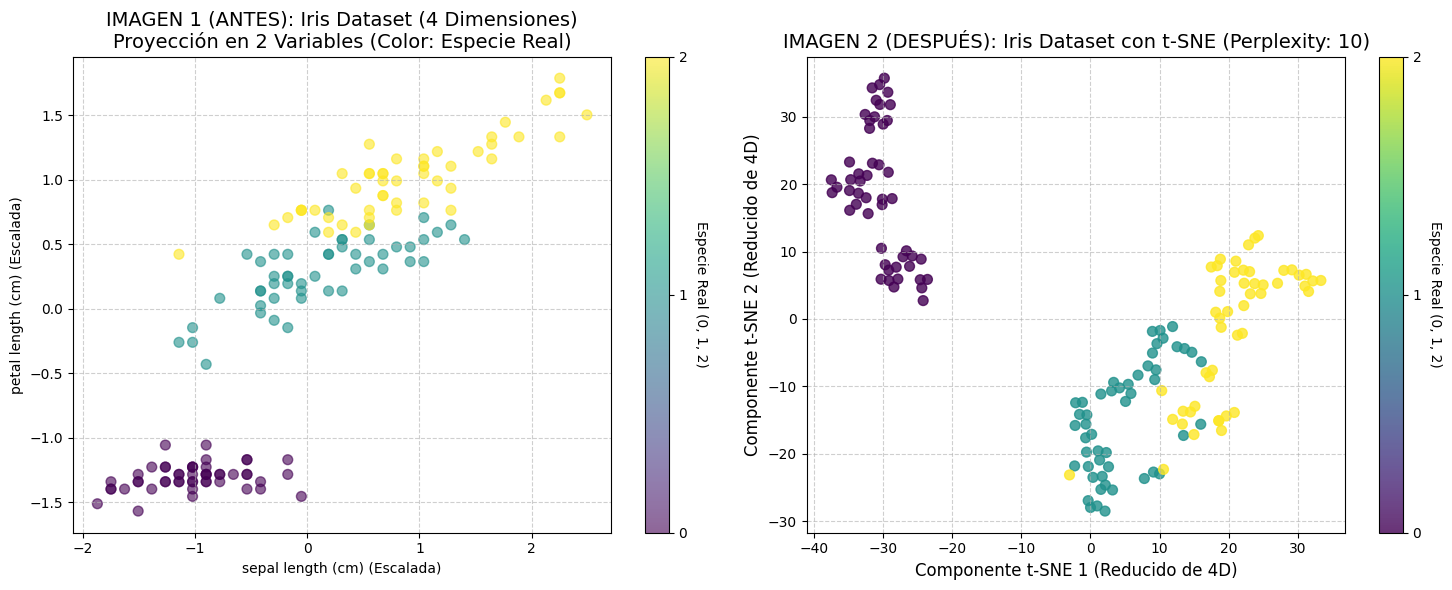

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------------------------
# Carga y Preparación del Dataset Iris
# ----------------------------------------------------------------------

iris = load_iris()
X = iris.data    # Las características (4 dimensiones: sepal length, width, etc.)
y = iris.target  # Las etiquetas reales (0, 1, 2 para las especies de Iris)
feature_names = iris.feature_names

#  Estandarización de Datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Dataset Iris cargado: {X_scaled.shape[0]} muestras, {X_scaled.shape[1]} dimensiones originales.")

# ----------------------------------------------------------------------
#  Aplicación del Algoritmo t-SNE
# ----------------------------------------------------------------------
perplexity_val = 10
n_components_val = 2

tsne = TSNE(
    n_components=n_components_val,
    perplexity=perplexity_val,
    n_iter=1000,
    random_state=42,
    learning_rate='auto',
    init='pca'
)

print(f"Ejecutando t-SNE (Perplexity: {perplexity_val})... Esto es rápido.")
# Reducimos las 4 dimensiones a 2
X_tsne = tsne.fit_transform(X_scaled)

# ----------------------------------------------------------------------
# 3. Visualización "ANTES" y "DESPUÉS"
# ----------------------------------------------------------------------

# Creamos un DataFrame para la visualización
df_iris = pd.DataFrame(X_scaled, columns=feature_names)
df_iris['target'] = y

plt.figure(figsize=(15, 6))

# --- IMAGEN 1 (ANTES): Visualización Original 2D ---
# Usamos dos de las 4 dimensiones para representar la complejidad
plt.subplot(1, 2, 1)

# Usamos las variables que mostraron mayor separación en tu DBSCAN anterior:
# petal length y sepal length (índices 2 y 0 después de escalado)
scatter_before = plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 2],
    c=y, # Coloreamos con la etiqueta real (para ver la separación original)
    cmap='viridis',
    s=50,
    alpha=0.6
)
plt.title('IMAGEN 1 (ANTES): Iris Dataset (4 Dimensiones)\nProyección en 2 Variables (Color: Especie Real)', fontsize=14)
plt.xlabel(feature_names[0] + ' (Escalada)')
plt.ylabel(feature_names[2] + ' (Escalada)')
plt.colorbar(scatter_before, ticks=[0, 1, 2]).set_label('Especie Real (0, 1, 2)', rotation=270, labelpad=15)
plt.grid(True, linestyle='--', alpha=0.6)


# --- IMAGEN 2 (DESPUÉS): Visualización 2D con t-SNE ---
plt.subplot(1, 2, 2)

scatter_after = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y,  # Color basado en la etiqueta real (la especie)
    cmap='viridis',
    s=50,
    alpha=0.8
)

plt.colorbar(scatter_after, ticks=[0, 1, 2]).set_label('Especie Real (0, 1, 2)', rotation=270, labelpad=15)


plt.title(f'IMAGEN 2 (DESPUÉS): Iris Dataset con t-SNE (Perplexity: {perplexity_val})', fontsize=14)
plt.xlabel('Componente t-SNE 1 (Reducido de 4D)', fontsize=12)
plt.ylabel('Componente t-SNE 2 (Reducido de 4D)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()